# Layer.ai Air Quality Prediction Challenge


**Install Layer**

In [1]:
pip install -q -U layer

     |████████████████████████████████| 189 kB 37.3 MB/s 
     |████████████████████████████████| 4.0 MB 68.4 MB/s 
     |████████████████████████████████| 343 kB 81.6 MB/s 
     |████████████████████████████████| 132 kB 74.6 MB/s 
     |████████████████████████████████| 235 kB 80.2 MB/s 
     |████████████████████████████████| 1.3 MB 75.1 MB/s 
     |████████████████████████████████| 35.3 MB 1.2 MB/s 
     |████████████████████████████████| 3.6 MB 93.5 MB/s 
     |████████████████████████████████| 106 kB 79.6 MB/s 
     |████████████████████████████████| 2.4 MB 59.5 MB/s 
     |████████████████████████████████| 79 kB 11.4 MB/s 
     |████████████████████████████████| 9.2 MB 74.4 MB/s 
     |████████████████████████████████| 140 kB 104.2 MB/s 
     |████████████████████████████████| 4.7 MB 90.1 MB/s 
     |████████████████████████████████| 2.4 MB 55.5 MB/s 
     |████████████████████████████████| 181 kB 111.6 MB/s 
     |████████████████████████████████| 77 kB 9.0 MB/s 
     |█████████

In [2]:
!pip install folium mapclassify geopandas -q

     |████████████████████████████████| 1.0 MB 47.2 MB/s 
     |████████████████████████████████| 16.7 MB 118 kB/s 
     |████████████████████████████████| 6.3 MB 53.2 MB/s 


In [3]:
import layer
from layer.decorators import dataset,model, pip_requirements

from sklearn.mixture import GaussianMixture as GMM 
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np 
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster,HeatMap

# DATA

**Fetch the datasets as Pandas DataFrames**

In [176]:
sample_submission = layer.get_dataset("zindi/air-quality/datasets/sample_submission").to_pandas()
test_df = layer.get_dataset("zindi/air-quality/datasets/test").to_pandas()
train_df = layer.get_dataset("zindi/air-quality/datasets/train").to_pandas()

Output()

Output()

Output()

In [177]:
# a copy of the original ids 
test_ids = test_df[['ID']].copy() 
train_id_cols = train_df[['ID']].copy()

y = train_df[['pm2_5']]


In [178]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [179]:
train_df.shape,test_df.shape

((9923, 71), (4254, 70))

**Log in to your Layer account using API key**

In [43]:

layer.login()

**Create a Layer project**

In [44]:
layer.init("air-quality-22_m1")

Your Layer project is here: https://app.layer.ai/viraaj/air-quality-22_m1

# Exploratory Data Analysis

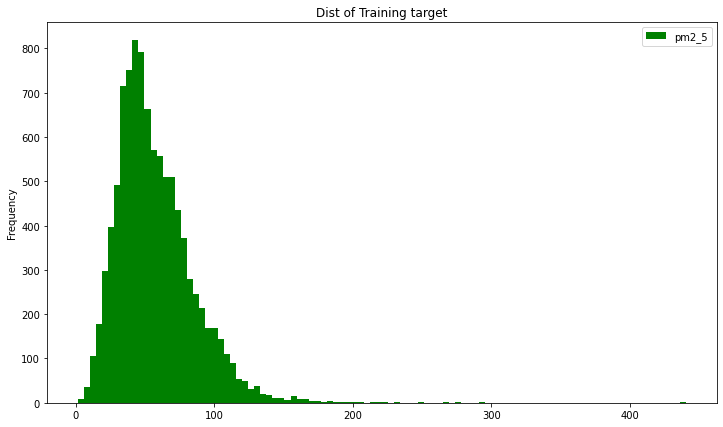

In [180]:
#distribution of pm2.5 readings
y.plot(kind='hist',bins=100,figsize=(12,7),title='Dist of Training target',color='g')

plt.show()

Do the `device` correspond to devices at different locations??

In [181]:
train_df['device'].unique()


array(['ANQ16PZJ', 'AB6051M4', 'A0WN66FH', 'aq_41', 'aq_54', 'AY2J2Q7Z',
       'AR2RHV97', 'aq_64', 'A95X5F9T', 'AW66FF7V', 'APZ80RTM', 'aq_31',
       'aq_59', 'aq_30', 'aq_76', 'aq_29', 'aq_70', 'APYZC5J7', 'aq_56',
       'AJCK5L86', 'aq_46', 'aq_61', 'aq_49', 'AKSLS0FP', 'aq_74',
       'aq_35', 'aq_43', 'aq_52', 'aq_60', 'aq_36', 'aq_45', 'aq_57',
       'aq_47', 'aq_79'], dtype=object)

Are there any new sensor locations in the test dataset ?

In [182]:
[sen for sen in test_df['device'].unique() if sen not in train_df['device'].unique()]

['aq_91', 'aq_98']

are all the locations are same across a individual device

In [183]:
# checking if all the locations are same across a individual device 
all(train_df.groupby('device').last()[['site_latitude','site_longitude']] == train_df.groupby('device').first()[['site_latitude','site_longitude']])

True

Count of `device` readings

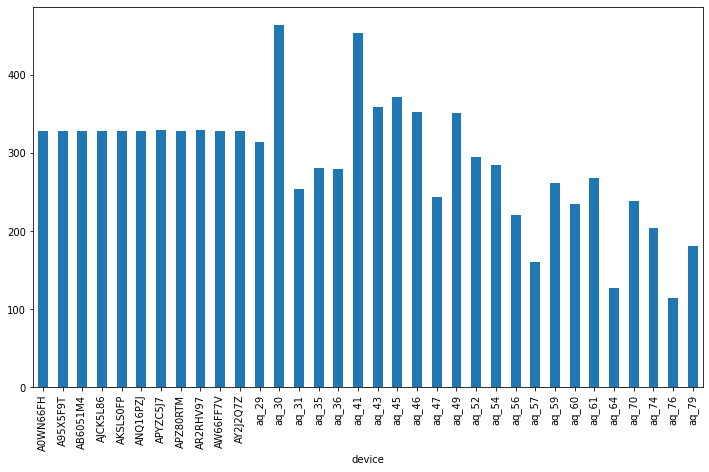

In [184]:
# how many readings per device ? 
train_df.groupby('device').size().plot(kind='bar',figsize=(12,7))

Where are the `devices` located ?  

In [185]:
#mean lat and longitude
# lat,lon = train_df.groupby('device').last()[['site_latitude','site_longitude']].mean().values

# basemap= folium.Map(tiles = "Stamen Terrain",
#               location = (lat,lon),min_zoom = 12)

**Convert to a geo-dataframe and plot device locations**

In [186]:
# train_gdf = gpd.GeoDataFrame(data = train_df,
#                              geometry = gpd.points_from_xy(x=train_df['site_longitude'],y=train_df['site_latitude'])
#                             )
#plotting unique locations
# train_gdf.groupby('device').last().\
#                             reset_index().\
#                         explore(tooltip=['device','pm2_5'],
#                                   marker_type=folium.Marker(),
#                                   m = basemap

#                                   )

What is the average of PM 2.5 readings? (Heatmap of values)

In [187]:
# pm_25 = train_gdf.groupby(['site_latitude','site_longitude'])['pm2_5'].mean().reset_index()

#heatmap:
# HeatMap(data=pm_25[['site_latitude','site_longitude','pm2_5']].values,
#         radius=40,
#         blur=15).add_to(basemap)
# basemap

What is the average of Temperature readings? (Heatmap of values)

In [188]:
# basemap2= folium.Map(tiles = "Stamen Terrain",
#               location = (lat,lon),min_zoom = 12)
#heatmap:

# temp = train_gdf.groupby(['site_latitude','site_longitude'])['temp_mean'].mean().reset_index()


# HeatMap(data=temp[['site_latitude','site_longitude','temp_mean']].dropna(axis=0).values,
#         radius=40,
#         blur=15).add_to(basemap2)

# basemap2

# Data preparation

**Creating clusters from the data**

In [189]:
n_gmm_components = 4

gmm_pipe = Pipeline(steps = [('scaling',StandardScaler()),
                             ('gmm',GMM(n_components = n_gmm_components,
                                        max_iter = 200))]
                    )
def gmm_clusters(train,test):
  '''seperate the region into location clusters'''

  combined_locations = train.append(test,
                                   ignore_index=True)[['site_latitude','site_longitude']]

  location_clusters = gmm_pipe.fit_predict(combined_locations)

  location_probs = pd.DataFrame(gmm_pipe.predict_proba(combined_locations),
                                columns = [f'cls_prob_{i}' for i in range(n_gmm_components)])



  train['loc_cluster'] = location_clusters[:len(train)]
  test['loc_cluster'] = location_clusters[len(train):]


  train = pd.concat(objs=[train, location_probs.iloc[:len(train)]],
                     axis=1)
  

  test = pd.concat(objs=[test, location_probs.iloc[len(train):].reset_index(drop=True)],
                     axis=1)

  return train,test 


train_df,test_df = gmm_clusters(train_df,test_df)

train_df.shape,test_df.shape

((9923, 76), (4254, 75))

**Creating Trend features**

In [190]:
def trend_features(train,test):
  '''create trend feeature for the datatset'''
  combined = train.append(test,ignore_index=True)

  for loc in combined.device.unique():
    if loc in train.device.to_list():

      subset = train[train.device==loc]
      start = train.date.min()


      diff = (subset.date - start).dt.days
      train.loc[train.device==loc,'trend'] = diff 

    if loc in test.device.to_list() :
      subset = test[test.device==loc]

      if not start:
        start = test.date.min()

      diff = (subset.date - start).dt.days
      test.loc[test.device==loc,'trend'] = diff

  return train,test


train_df,test_df = trend_features(train_df,test_df)

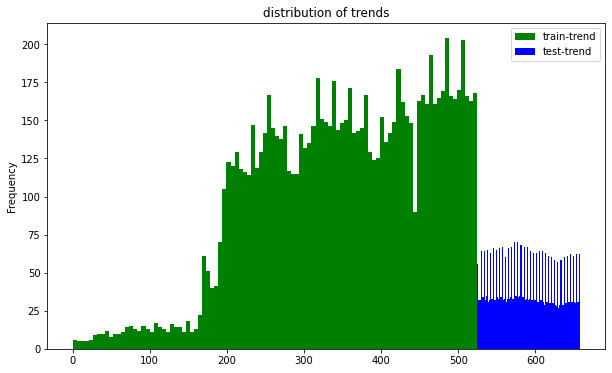

In [191]:
train_df.trend.plot(kind='hist',bins = 100,label = 'train-trend',color='g',title='distribution of trends',figsize=(10,6))
test_df.trend.plot(kind='hist',bins = 100,label = 'test-trend',color='b')
plt.legend()
plt.show()

**seperating features**

In [192]:

density_feat = [col for col in train_df.columns if 'density' in col]


angle_feat = [col for col in train_df.columns if 'angle' in col]


other_feat = [col for col in train_df.columns if col not in [*angle_feat,*density_feat]]
other_feat.remove('pm2_5')


**Strategy for filling up null values**


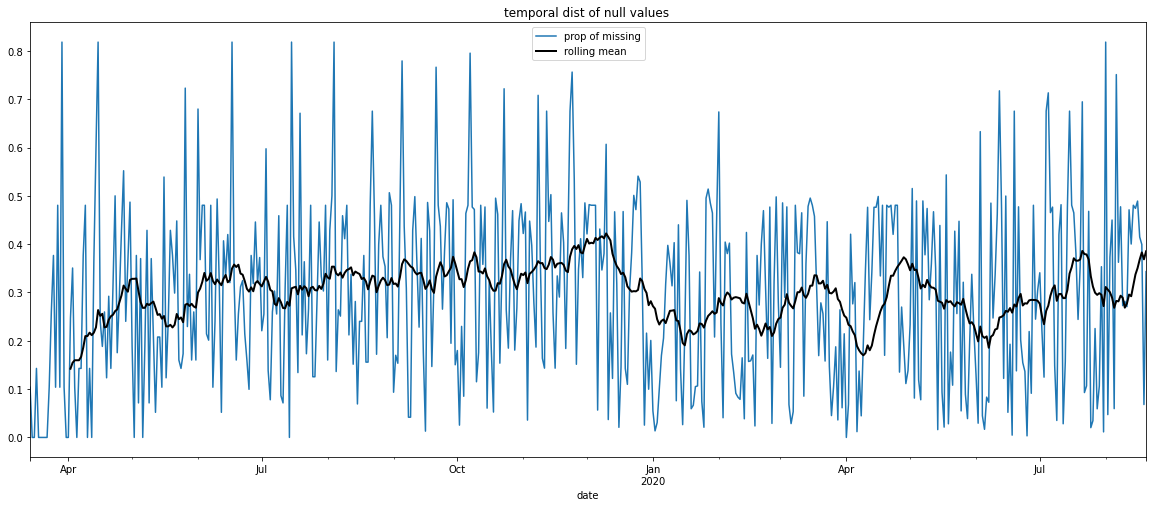

In [193]:
#temporal dist of missing values 

def missing_per(grp):
  return grp.isnull().sum().sum() / grp.size

train_df.groupby('date').apply(missing_per).plot(figsize=(20,8),title='temporal dist of null values ',label = 'prop of missing')
train_df.groupby('date').apply(missing_per).rolling(window=20).mean().plot(linewidth=2,figsize=(20,8),label='rolling mean',color='k')
plt.legend()
plt.show()


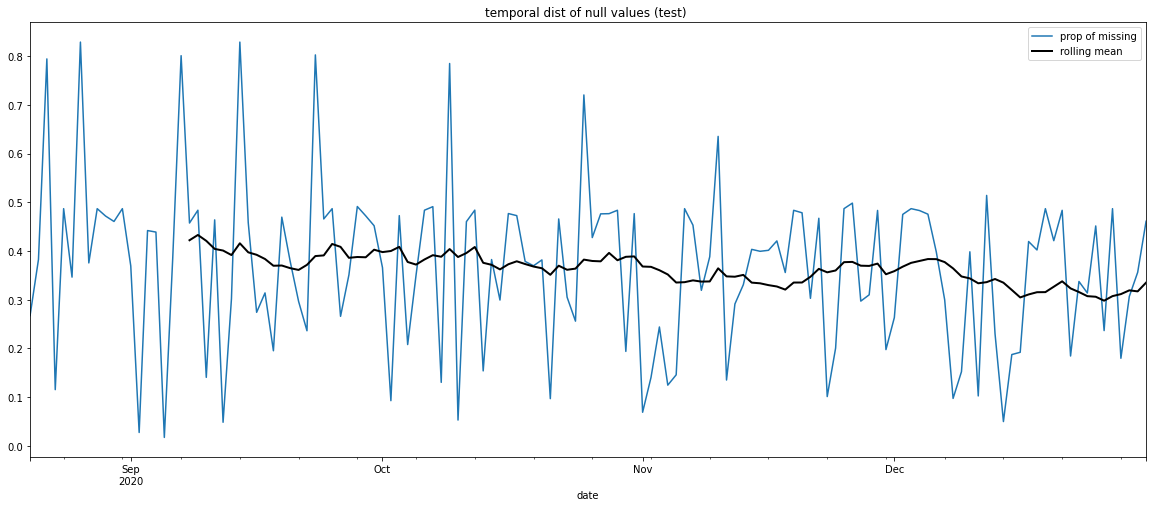

In [194]:
test_df.groupby('date').apply(missing_per).plot(figsize=(20,8),title='temporal dist of null values (test) ',label = 'prop of missing')
test_df.groupby('date').apply(missing_per).rolling(window=20).mean().plot(linewidth=2,figsize=(20,8),label='rolling mean',color='k')
plt.legend()
plt.show()


**Creating datetime features**

In [195]:
def time_features(df,col):
    '''extract features from time_stamps'''
    df['year']=df[col].dt.year - 2018
    df['month']=df[col].dt.month
    
    # df.drop(col,inplace=True,axis=1)
    return df

train_df=time_features(train_df,'date')
test_df=time_features(test_df,'date')

def time_encodings(df):
    df['cos_'+'month']=np.cos(2.*np.pi*df['month']/12)
    df['sin_'+'month']=np.sin(2.*np.pi*df['month']/12)
    
    # df['cos_'+'hour']=np.cos(2.*np.pi*df['hour']/12)
    # df['sin_'+'hour']=np.sin(2.*np.pi*df['hour']/12)
    
    df.drop(['month'],axis=1,inplace=True)
    
    return df 
    
train_df=time_encodings(train_df)
test_df=time_encodings(test_df)

train_df.shape,test_df.shape

((9923, 80), (4254, 79))

Marking the number of null entries in a row

In [196]:
def mark_null(df):
  '''mark the number of columns null in a row'''
  df['dens_nulls'] = df[density_feat].isnull().sum(axis=1) 
  df['ang_nulls'] = df[angle_feat].isnull().sum(axis=1) 
  df['othr_nulls'] = df[other_feat].isnull().sum(axis=1) 

  return df  



train_df = mark_null(train_df)
test_df = mark_null(test_df)

In [197]:
train_df.shape,test_df.shape

((9923, 83), (4254, 82))

Filling null entries 

In [198]:
def interpolate(group):
  # group = group.reset_index()
  try:

    return group.interpolate(method="linear", inplace=False, limit_direction="both")

  except Exception as e:
    print(e)
    return group

In [199]:
train_df.shape,test_df.shape

((9923, 83), (4254, 82))

**Filling Null values with linear interpolation**

In [200]:
linintp_train = pd.DataFrame()

for idx,grp in train_df.groupby('device'):
  grp = grp.reset_index(drop=True)
  grp=grp.sort_values(by='date')

  grp.interpolate(method="bfill", inplace=True)
  grp.interpolate(method="ffill", inplace=True)
  linintp_train = linintp_train.append(grp,
                         ignore_index=True)
  

linintp_train.isnull().sum().sum()

0

In [201]:
linintp_test = pd.DataFrame()


for idx,grp in test_df.groupby('device'):

  grp = grp.reset_index()

  grp.sort_values(by='date',inplace=True)

  grp.interpolate(method="bfill", inplace=True)
  grp.interpolate(method="ffill", inplace=True)
  linintp_test = linintp_test.append(grp,
                         ignore_index=True)
  

linintp_test.isnull().sum().sum()

87

**filling the rest values by ffill and bfill**

In [203]:
linintp_test.sort_values(by='date',inplace=True)
linintp_test = linintp_test.ffill().bfill()

**reducing the dimensionality with PCA**

In [206]:
from sklearn.decomposition import PCA
pca_pipeline = Pipeline(steps = [('standard_scaler',StandardScaler()),
                                 ('pca',PCA(n_components=2))
                                 ]
                       )


def calculate_index(
               columns_names,
               df,
               print_lambda=True):
    '''calculate indexes, by sum after multiplying the pc1 with features in that index. '''
    
    col_df = df.loc[:,columns_names]
    
    pca = pca_pipeline.fit_transform(col_df)
    
    
    if print_lambda :
        eig_vec = pca_pipeline['pca'].components_
        total_var_ratio = pca_pipeline['pca'].explained_variance_ratio_.sum()
        print(f'total explained variance is {total_var_ratio} % of original')
        
        print('first pc index = ' + ' + \n'.join(['*'.join([str(round(val,3)) , column]) for val,column in zip(list(eig_vec[0,:]),col_df.columns.tolist())]) )
        
    assert len(pca) == len(col_df), 'Why do you make life hard for everyone'
    
    
    return pca

## Model training with Layer

In [224]:
@model("air_model")
@pip_requirements(packages=["lightgbm","seaborn"])
def train():
    
    # Imports 
    from sklearn.model_selection import train_test_split
    import lightgbm as lgb
    from sklearn import metrics
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # CONFIG
    test_size = 0.25
    random_state = 0
    layer.log({"test_size":test_size})
    layer.log({"random_state":random_state})
    
    date_mask = linintp_train.date > '06-01-2020'
    X = linintp_train.drop(["pm2_5", "ID","date"], axis=1)

    labelencoder = LabelEncoder()
    X = X.assign(device = labelencoder.fit_transform(X["device"]))
    y = train_df["pm2_5"]


    X_train,y_train = X[~date_mask],y[~date_mask]

    X_test,y_test = X[date_mask],y[date_mask]
    
    lgb_train = lgb.Dataset(X_train, 
                            y_train)
    
    lgb_eval = lgb.Dataset(X_test, 
                           y_test, 
                           reference=lgb_train)
    
    params = {'boosting_type': 'dart',
              'objective': 'regression',
              'learning_rate': 0.05,
              'feature_fraction': 0.6,
              'lambda_l1':10
              }
    
    layer.log(params)
    
    
    categories = X.select_dtypes(include=['object']).columns.tolist() 
    feature_name = list(X.columns)
    evals={}
    gbm = lgb.train(
                params,
                lgb_train,
                num_boost_round=1000,
                callbacks = [lgb.record_evaluation(evals)],
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['train','valid']
    )
    
    
    predictions = gbm.predict(X_test)
    predctions_df = pd.DataFrame(predictions,columns=['Predicted pm2_5'])
    layer.log({"Sample predictions":predctions_df.head(100)})
    layer.log({'Mean Absolute Error':metrics.mean_absolute_error(y_test, predictions)})
    layer.log({'Mean Squarred Error': metrics.mean_squared_error(y_test, predictions)})
    layer.log({'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, predictions))})

    importance = gbm.feature_importance()
    importances_rfc_df = pd.DataFrame(importance, index=X.columns, columns=['Importance'])
    importances_rfc_df = importances_rfc_df.sort_values(by='Importance', ascending=False)
    importances_rfc_df = importances_rfc_df[importances_rfc_df['Importance'] > 0]
    importances_rfc_df = importances_rfc_df.head(10)

    plt.figure(figsize=(8,8))
    plt.xticks(rotation=60, fontsize = 20)
    sns.barplot(y=importances_rfc_df.index, x=importances_rfc_df['Importance'])
    layer.log({"Feature importance": plt.gcf()})
    layer.log({"Training metrics": lgb.plot_metric(evals)})
    return gbm
    

In [228]:
# Imports 
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# CONFIG
test_size = 0.25
random_state = 0
# 

date_mask = linintp_train.date > '06-01-2020'
X = linintp_train.drop(["pm2_5", "ID","date"], axis=1)

labelencoder = LabelEncoder()
X = X.assign(device = labelencoder.fit_transform(X["device"]))

y = train_df["pm2_5"]


X_train,y_train = X[~date_mask],y[~date_mask]
X_test,y_test = X[date_mask],y[date_mask]

lgb_train = lgb.Dataset(X, 
                        y)

lgb_eval = lgb.Dataset(X_test, 
                        y_test, 
                        reference=lgb_train)

params = {'boosting_type': 'dart',
          'objective': 'regression',
          'learning_rate': 0.05,
          'feature_fraction': 0.65
          }



categories = X.select_dtypes(include=['object']).columns.tolist() 
feature_name = list(X.columns)
evals={}
gbm = lgb.train(
            params,
            lgb_train,
            num_boost_round=1000,
            callbacks = [lgb.record_evaluation(evals)],
            valid_sets=[lgb_train, lgb_eval],
            valid_names=['train','valid']
)


predictions = gbm.predict(X_test)
predctions_df = pd.DataFrame(predictions,columns=['Predicted pm2_5'])

[1]	train's l2: 762.96	valid's l2: 724.929
[2]	train's l2: 760.327	valid's l2: 724.881
[3]	train's l2: 757.209	valid's l2: 724.744
[4]	train's l2: 754.033	valid's l2: 725.228
[5]	train's l2: 750.76	valid's l2: 725.58
[6]	train's l2: 747.927	valid's l2: 726.103
[7]	train's l2: 744.852	valid's l2: 726.084
[8]	train's l2: 745.751	valid's l2: 725.922
[9]	train's l2: 742.724	valid's l2: 726.207
[10]	train's l2: 740.05	valid's l2: 726.622
[11]	train's l2: 737.428	valid's l2: 726.529
[12]	train's l2: 738.395	valid's l2: 726.363
[13]	train's l2: 735.776	valid's l2: 726.534
[14]	train's l2: 733.485	valid's l2: 726.859
[15]	train's l2: 730.549	valid's l2: 727.102
[16]	train's l2: 727.755	valid's l2: 727.306
[17]	train's l2: 725.417	valid's l2: 727.349
[18]	train's l2: 723.25	valid's l2: 727.722
[19]	train's l2: 721.07	valid's l2: 727.99
[20]	train's l2: 718.833	valid's l2: 728.379
[21]	train's l2: 719.33	valid's l2: 728.114
[22]	train's l2: 717.155	valid's l2: 727.892
[23]	train's l2: 714.96	val

In [229]:
metrics.mean_absolute_error(y_test, predictions),metrics.mean_squared_error(y_test, predictions)

(21.040908390922915, 748.8546296571009)

## Use the model to make predictions 

In [ ]:
my_model = layer.get_model("zindi/sample-air-quality/models/air_model").get_train()

In [230]:
test_orig = test_ids.merge(linintp_test,
                          on='ID',
                          how = 'left')

test_orig.shape

(4254, 83)

In [231]:
from sklearn.preprocessing import LabelEncoder
X = test_orig.drop(["ID","date"], axis=1)
labelencoder = LabelEncoder()
X = X.assign(device = labelencoder.fit_transform(X["device"]))

In [232]:
predictions = gbm.predict(X)

## Generate submission file

In [233]:
import pandas as pd
submission = pd.DataFrame(data=test_df["ID"], columns = ["ID"])
submission["pm2_5"] = predictions

In [234]:
submission.head()

,ID,pm2_5
0,ID_UOH62J0XHX,76.791515
1,ID_4OPWSB0UHJ,77.177709
2,ID_3SLMNNG1Z3,82.657149
3,ID_MFUHTXYPM4,76.958120
4,ID_TY1DAND8ZP,86.659756


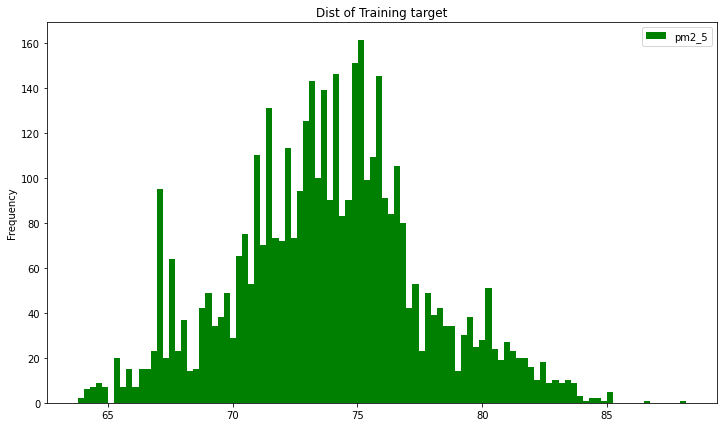

In [235]:
submission.plot(kind='hist',bins=100,figsize=(12,7),title='Dist of test target',color='g')


In [236]:
submission.to_csv("submission.csv",index=False)